In [177]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [178]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')

    
    headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]

    
    rows = []
    club_links = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        cols_text = [col.text.strip() for col in cols]
        cols_text[-1] = '-'.join(cols_text[-1].split()) 
        club_link = row.find('a')['href']
        cols_text.insert(1, f"https://www.jleague.co{club_link}")
        club_links.append(f"https://www.jleague.co{club_link}")
        rows.append(cols_text)

    
    headers.insert(1, 'Link')

    
    df = pd.DataFrame(rows, columns=headers)

df.rename(columns={'CLUB': 'Club', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
print(df)


   Position                                                      Link  \
0         1           https://www.jleague.co/clubs/FC-Machida-Zelvia/   
1         2             https://www.jleague.co/clubs/Kashima-Antlers/   
2         3                 https://www.jleague.co/clubs/Vissel-Kobe/   
3         4                 https://www.jleague.co/clubs/Gamba-Osaka/   
4         5              https://www.jleague.co/clubs/Nagoya-Grampus/   
5         6                  https://www.jleague.co/clubs/Urawa-Reds/   
6         7                https://www.jleague.co/clubs/Cerezo-Osaka/   
7         8         https://www.jleague.co/clubs/Sanfrecce-Hiroshima/   
8         9                    https://www.jleague.co/clubs/FC-TOKYO/   
9        10              https://www.jleague.co/clubs/Kashiwa-Reysol/   
10       11              https://www.jleague.co/clubs/Avispa-Fukuoka/   
11       12                 https://www.jleague.co/clubs/Tokyo-Verdy/   
12       13                https://www.jleague.co/c

In [179]:
df.dtypes

Position    object
Link        object
Club        object
P           object
W           object
D           object
L           object
GF          object
GA          object
GD          object
Points      object
Form        object
dtype: object

In [180]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)

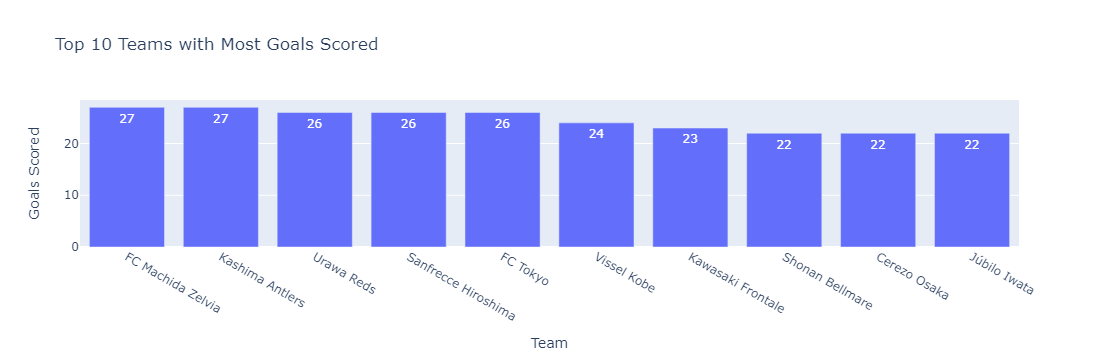

In [181]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)

fig = go.Figure([go.Bar(x=top_scorers['Club'], y=top_scorers['GF'], text=top_scorers['GF'], textposition='auto')])
fig.update_layout(title='Top 10 Teams with Most Goals Scored',
                  xaxis_title='Team',
                  yaxis_title='Goals Scored')
fig.show()

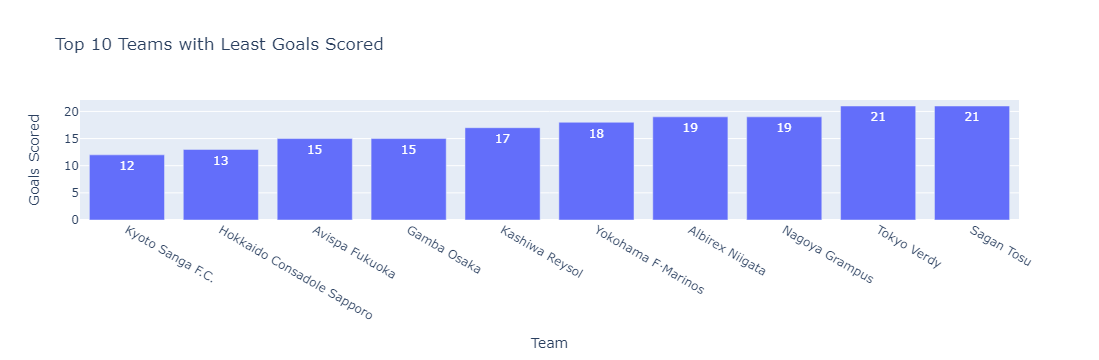

In [182]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)

fig = go.Figure([go.Bar(x=less_scorers['Club'], y=less_scorers['GF'], text=less_scorers['GF'], textposition='auto')])
fig.update_layout(title='Top 10 Teams with Least Goals Scored',
                  xaxis_title='Team',
                  yaxis_title='Goals Scored')
fig.show()

In [183]:
grouped = df.groupby('GF')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Scored', 'Count', 'Teams']

grouped = grouped.sort_values(by='Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print(grouped)

    Scored  Count                                        Teams
0       27      2           FC Machida Zelvia, Kashima Antlers
1       26      3    Urawa Reds, Sanfrecce Hiroshima, FC Tokyo
2       24      1                                  Vissel Kobe
3       23      1                            Kawasaki Frontale
4       22      3  Cerezo Osaka, Júbilo Iwata, Shonan Bellmare
5       21      2                      Tokyo Verdy, Sagan Tosu
6       19      2              Nagoya Grampus, Albirex Niigata
7       18      1                           Yokohama F･Marinos
8       17      1                               Kashiwa Reysol
9       15      2                  Gamba Osaka, Avispa Fukuoka
10      13      1                   Hokkaido Consadole Sapporo
11      12      1                             Kyoto Sanga F.C.


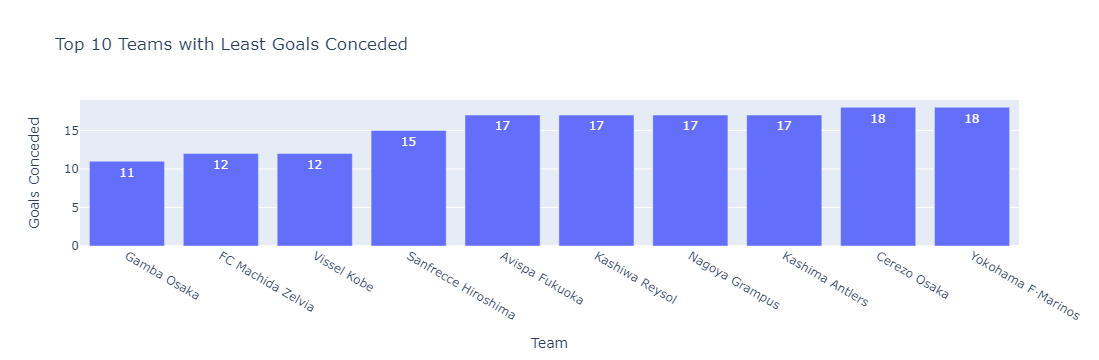

In [184]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)

fig = go.Figure([go.Bar(x=best_defense['Club'], y=best_defense['GA'], text=best_defense['GA'], textposition='auto')])
fig.update_layout(title='Top 10 Teams with Least Goals Conceded',
                  xaxis_title='Team',
                  yaxis_title='Goals Conceded')
fig.show()

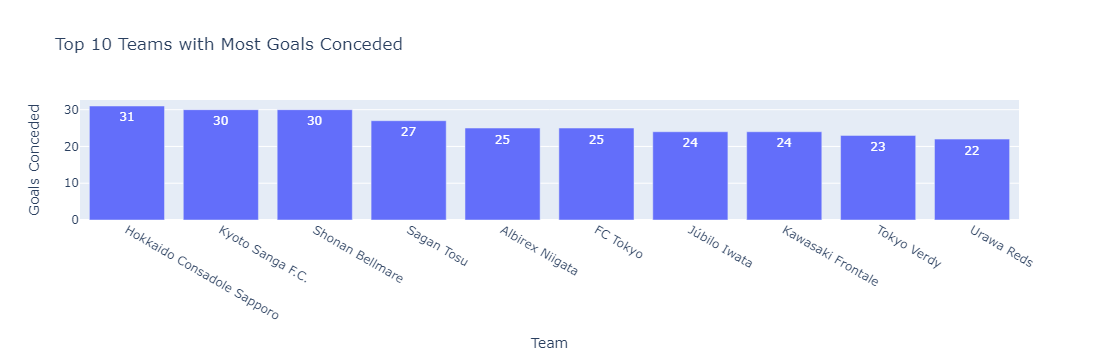

In [185]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)

fig = go.Figure([go.Bar(x=worst_defense['Club'], y=worst_defense['GA'], text=worst_defense['GA'], textposition='auto')])
fig.update_layout(title='Top 10 Teams with Most Goals Conceded',
                  xaxis_title='Team',
                  yaxis_title='Goals Conceded')
fig.show()

In [186]:
grouped = df.groupby('GA')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Conceded', 'Count', 'Teams']

grouped = grouped.sort_values(by='Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print(grouped)

    Conceded  Count  \
0         11      1   
1         12      2   
2         15      1   
3         17      4   
4         18      2   
5         22      1   
6         23      1   
7         24      2   
8         25      2   
9         27      1   
10        30      2   
11        31      1   

                                                              Teams  
0                                                       Gamba Osaka  
1                                    FC Machida Zelvia, Vissel Kobe  
2                                               Sanfrecce Hiroshima  
3   Kashima Antlers, Nagoya Grampus, Kashiwa Reysol, Avispa Fukuoka  
4                                  Cerezo Osaka, Yokohama F･Marinos  
5                                                        Urawa Reds  
6                                                       Tokyo Verdy  
7                                   Júbilo Iwata, Kawasaki Frontale  
8                                         FC Tokyo, Albirex Niigata  


In [187]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Club', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print(l5p)


   Position                        Club  Points over the last 5 games
0         1           FC Machida Zelvia                            13
1         4                 Gamba Osaka                            13
2         2             Kashima Antlers                            13
3         5              Nagoya Grampus                            10
4         6                  Urawa Reds                            10
5         3                 Vissel Kobe                             9
6        10              Kashiwa Reysol                             8
7        12                 Tokyo Verdy                             8
8        18             Shonan Bellmare                             7
9        11              Avispa Fukuoka                             7
10       17                  Sagan Tosu                             6
11        9                    FC Tokyo                             5
12        8         Sanfrecce Hiroshima                             5
13       15         

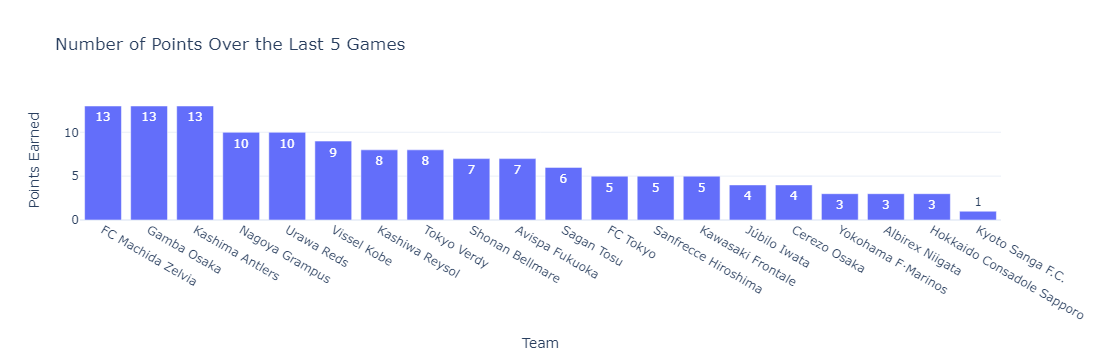

In [188]:
fig = go.Figure([go.Bar(x=l5p['Club'], y=l5p['Points over the last 5 games'], text=l5p['Points over the last 5 games'], textposition='auto')])
fig.update_layout(
    title='Number of Points Over the Last 5 Games',
    xaxis_title='Team',
    yaxis_title='Points Earned',
    template='plotly_white'
)

fig.show()


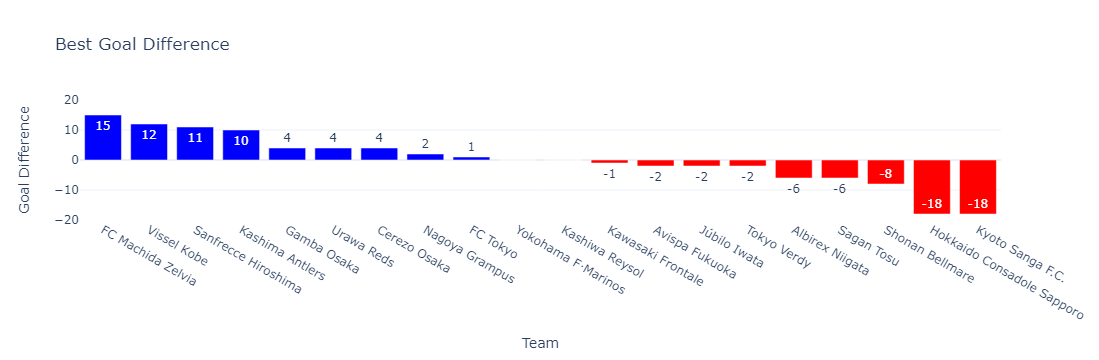

In [189]:
import plotly.graph_objects as go
df2 = df.sort_values(by='GD', ascending=False)
fig = go.Figure()

colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]

fig.add_trace(go.Bar(
    x=df2['Club'],
    y=df2['GD'],
    text=df2['GD'],
    textposition='auto',
    marker_color=colors  
))

fig.update_layout(
    title='Best Goal Difference',
    xaxis_title='Team',
    yaxis_title='Goal Difference',
    yaxis=dict(range=[-20, 20]),  
    template='plotly_white'
)

fig.show()


In [190]:
grouped = df.groupby('Points')['Club'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Points', 'Count', 'Teams']

grouped = grouped.sort_values(by='Points', ascending=False).reset_index(drop=True)

print(grouped)

    Points  Count                                  Teams
0       35      1                      FC Machida Zelvia
1       32      1                        Kashima Antlers
2       29      1                            Vissel Kobe
3       28      1                            Gamba Osaka
4       26      1                         Nagoya Grampus
5       24      2               Urawa Reds, Cerezo Osaka
6       23      2          Sanfrecce Hiroshima, FC Tokyo
7       22      2         Kashiwa Reysol, Avispa Fukuoka
8       21      1                            Tokyo Verdy
9       18      1                           Júbilo Iwata
10      17      2  Yokohama F･Marinos, Kawasaki Frontale
11      16      1                        Albirex Niigata
12      14      2            Sagan Tosu, Shonan Bellmare
13      11      1             Hokkaido Consadole Sapporo
14      10      1                       Kyoto Sanga F.C.


In [191]:
df['PointsPerGame'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='PointsPerGame', ascending=False)

df_sorted = df_sorted[['Position','Club', 'PointsPerGame']]

print(df_sorted)

   Position                        Club  PointsPerGame
0         1           FC Machida Zelvia       2.187500
1         2             Kashima Antlers       2.000000
2         3                 Vissel Kobe       1.812500
3         4                 Gamba Osaka       1.750000
4         5              Nagoya Grampus       1.625000
7         8         Sanfrecce Hiroshima       1.533333
5         6                  Urawa Reds       1.500000
6         7                Cerezo Osaka       1.500000
9        10              Kashiwa Reysol       1.466667
8         9                    FC Tokyo       1.437500
10       11              Avispa Fukuoka       1.375000
11       12                 Tokyo Verdy       1.312500
13       14          Yokohama F･Marinos       1.307692
12       13                Júbilo Iwata       1.125000
14       15           Kawasaki Frontale       1.062500
15       16             Albirex Niigata       1.000000
16       17                  Sagan Tosu       0.933333
17       1